<a href="https://colab.research.google.com/github/Jayjake1/NYC_taxi_trip_predication/blob/main/cleaned_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

df = pd.read_csv('/content/drive/MyDrive/Almabetter/new_nyc_data.csv')

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_year           0
pickup_month          0
pickup_day            0
pickup_hour           0
pickup_minute         0
pickup_second         0
pickup_dayname        0
distance              0
Velocity              0
dtype: int64

In [ ]:
df.shape

(1217933, 20)

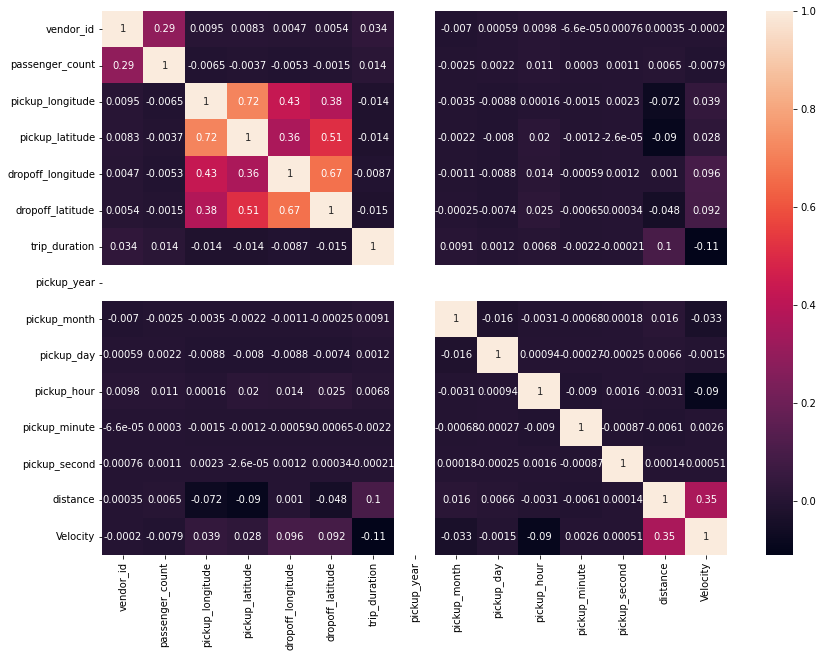

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.passenger_count.value_counts()

1    865342
2    173443
5     64866
3     50221
6     40312
4     23749
Name: passenger_count, dtype: int64

In [ ]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,distance,Velocity
vendor_id,1.000000,0.290420,0.009540,0.008282,0.004663,0.005358,0.033910,NaN,-0.006965,0.000594,0.009794,-0.000066,0.000758,0.000345,-0.000198
passenger_count,0.290420,1.000000,-0.006464,-0.003706,-0.005261,-0.001531,0.013507,NaN,-0.002547,0.002152,0.010544,0.000302,0.001092,0.006459,-0.007896
pickup_longitude,0.009540,-0.006464,1.000000,0.716216,0.432395,0.377284,-0.014104,NaN,-0.003464,-0.008806,0.000159,-0.001463,0.002288,-0.072358,0.039008
pickup_latitude,0.008282,-0.003706,0.716216,1.000000,0.360412,0.514271,-0.014094,NaN,-0.002169,-0.008026,0.019609,-0.001186,-0.000026,-0.090463,0.027862
dropoff_longitude,0.004663,-0.005261,0.432395,0.360412,1.000000,0.669459,-0.008675,NaN,-0.001069,-0.008842,0.014023,-0.000588,0.001181,0.001031,0.096361
dropoff_latitude,0.005358,-0.001531,0.377284,0.514271,0.669459,1.000000,-0.014730,NaN,-0.000246,-0.007442,0.024945,-0.000655,0.000340,-0.047964,0.091508
trip_duration,0.033910,0.013507,-0.014104,-0.014094,-0.008675,-0.014730,1.000000,NaN,0.009099,0.001164,0.006829,-0.002218,-0.000211,0.100866,-0.108862
pickup_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_month,-0.006965,-0.002547,-0.003464,-0.002169,-0.001069,-0.000246,0.009099,NaN,1.000000,-0.015670,-0.003102,-0.000680,0.000179,0.015887,-0.032518
pickup_day,0.000594,0.002152,-0.008806,-0.008026,-0.008842,-0.007442,0.001164,NaN,-0.015670,1.000000,0.000940,-0.000270,-0.000251,0.006614,-0.001539


In [ ]:
# new=['pickup_month','pickup_day','pickup_hour','distance','velocity']

# for i in new:
#   sns.regplot(x=df[i],y = df.trip_duration)

In [ ]:
# sns.regplot(x=df['distance'],y = df['trip_duration'])

In [ ]:
df[df['trip_duration']>20]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_dayname,distance,Velocity
438,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,23.498333,2016,2,20,4,3,6,Saturday,2.992817,0.127363
946,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,23.930278,2016,5,7,18,36,22,Saturday,1.176094,0.049147
1552,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,23.986667,2016,6,7,12,58,48,Tuesday,4.366104,0.182022
2889,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,23.954444,2016,2,13,0,21,49,Saturday,1.859416,0.077623
3514,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,23.665833,2016,3,18,11,54,20,Friday,2.144412,0.090612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214730,id2743253,2,2016-06-23 16:04:53,2016-06-24 16:01:33,1,-74.008759,40.719040,-73.972305,40.749691,N,23.944444,2016,6,23,16,4,53,Thursday,4.588021,0.191611
1216063,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,23.953611,2016,2,8,19,11,31,Monday,1.338292,0.055870
1216707,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,23.697500,2016,6,8,16,29,12,Wednesday,0.725878,0.030631
1217170,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,23.976111,2016,2,2,11,31,10,Tuesday,1.673445,0.069796


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


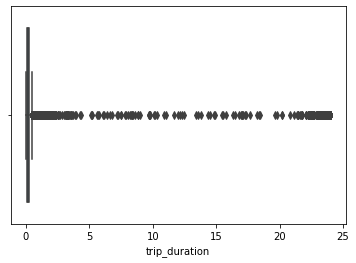

In [ ]:
sns.boxplot(df.trip_duration)

In [ ]:
new=df[df.trip_duration<15]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


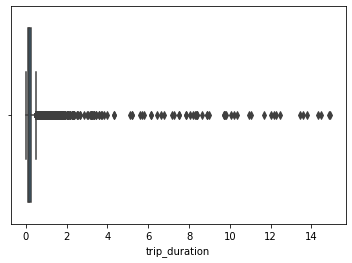

In [ ]:
sns.boxplot(new.trip_duration)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_day',
       'pickup_hour', 'pickup_minute', 'pickup_second', 'pickup_dayname',
       'distance', 'Velocity'],
      dtype='object')

In [ ]:
df.drop(['pickup_minute','pickup_second'],inplace=True,axis=1)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_day',
       'pickup_hour', 'pickup_dayname', 'distance', 'Velocity'],
      dtype='object')

In [ ]:
new=pd.get_dummies(df.store_and_fwd_flag,prefix='store_fwd_flag')

In [ ]:
df['store_and_fwd_flag'].value_counts()

N    1212263
Y       5670
Name: store_and_fwd_flag, dtype: int64

In [ ]:
new.value_counts()

store_fwd_flag_N  store_fwd_flag_Y
1                 0                   1212263
0                 1                      5670
dtype: int64

In [ ]:
df = pd.merge(
    left=df,
    right=new,
    left_index=True,
    right_index=True,
)

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_year', 'pickup_month', 'pickup_day',
       'pickup_hour', 'pickup_dayname', 'distance', 'Velocity',
       'store_fwd_flag_N', 'store_fwd_flag_Y'],
      dtype='object')

In [ ]:
df.drop(['store_and_fwd_flag','pickup_year'],inplace=True,axis = 1)

In [ ]:
new_month = pd.get_dummies(df['pickup_month'])
new_month=new_month.rename(columns={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'})

In [ ]:
df = pd.merge(
    left=df,
    right=new_month,
    left_index=True,
    right_index=True,
)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_dayname,distance,Velocity,store_fwd_flag_N,store_fwd_flag_Y,Jan,Feb,Mar,Apr,May,Jun
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0.126389,3,14,17,Monday,1.498521,11.856428,1,0,0,0,1,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0.184167,6,12,0,Sunday,1.805507,9.803659,1,0,0,0,0,0,0,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0.590000,1,19,11,Tuesday,6.385098,10.822201,1,0,1,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0.119167,4,6,19,Wednesday,1.485498,12.465721,1,0,0,0,0,1,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0.120833,3,26,13,Saturday,1.188588,9.836594,1,0,0,0,1,0,0,0


In [ ]:
new_month = pd.get_dummies(df['pickup_dayname'])
# new_month=new_month.rename(columns={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'})
df = pd.merge(
    left=df,
    right=new_month,
    left_index=True,
    right_index=True,
)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_dayname,distance,Velocity,store_fwd_flag_N,store_fwd_flag_Y,Jan,Feb,Mar,Apr,May,Jun,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0.126389,3,14,17,Monday,1.498521,11.856428,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0.184167,6,12,0,Sunday,1.805507,9.803659,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0.590000,1,19,11,Tuesday,6.385098,10.822201,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0.119167,4,6,19,Wednesday,1.485498,12.465721,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0.120833,3,26,13,Saturday,1.188588,9.836594,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
def time_div(x):
  if x>=21 and x<=23:
    return 'Night'
  elif x>=17 and x<21:
    return 'Evening'
  elif x >=12  and x<17:
    return 'Afternoon'
  elif x>=5  and x<12:
    return 'Morning'    
  elif x >= 0 and x<5:
    return 'Night'


In [ ]:
# df[df['period_in_day']=='Night']

In [ ]:
df['period_in_day'] = df['pickup_hour'].apply(time_div)

In [ ]:
df['period_in_day'].value_counts()

Morning      318580
Afternoon    304286
Night        299941
Evening      295126
Name: period_in_day, dtype: int64

In [ ]:
df['period_in_day'].count()

1217933

In [ ]:
len(df['pickup_hour'])

1217933

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_dayname',
       'distance', 'Velocity', 'store_fwd_flag_N', 'store_fwd_flag_Y', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'period_in_day'],
      dtype='object')

In [ ]:
df[['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'pickup_day', 'pickup_dayname',
       'distance', 'Velocity', 'store_fwd_flag_N', 'store_fwd_flag_Y', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'pickup_hour','period_in_day']]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_dayname,distance,Velocity,store_fwd_flag_N,store_fwd_flag_Y,Jan,Feb,Mar,Apr,May,Jun,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,pickup_hour,period_in_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0.126389,3,14,Monday,1.498521,11.856428,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,17,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0.184167,6,12,Sunday,1.805507,9.803659,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,Night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0.590000,1,19,Tuesday,6.385098,10.822201,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,11,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0.119167,4,6,Wednesday,1.485498,12.465721,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,19,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0.120833,3,26,Saturday,1.188588,9.836594,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,13,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217928,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0.216111,4,8,Friday,1.225080,5.668751,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,13,Afternoon
1217929,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0.181944,1,10,Sunday,6.049836,33.251005,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,7,Morning
1217930,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0.212222,4,22,Friday,7.824606,36.869870,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,6,Morning
1217931,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0.103611,1,5,Tuesday,1.092564,10.544853,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,15,Afternoon


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


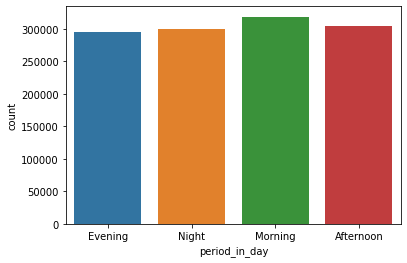

In [ ]:
sns.countplot(df['period_in_day'])

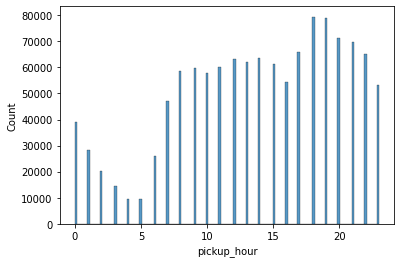

In [ ]:
sns.histplot(df['pickup_hour'])

In [ ]:
new_day = pd.get_dummies(df['period_in_day'])
# new_month=new_month.rename(columns={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun'})
df = pd.merge(
    left=df,
    right=new_day,
    left_index=True,
    right_index=True,
)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_dayname,distance,Velocity,store_fwd_flag_N,store_fwd_flag_Y,Jan,Feb,Mar,Apr,May,Jun,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,period_in_day,Afternoon,Evening,Morning,Night
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0.126389,3,14,17,Monday,1.498521,11.856428,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,Evening,0,1,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0.184167,6,12,0,Sunday,1.805507,9.803659,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,Night,0,0,0,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0.590000,1,19,11,Tuesday,6.385098,10.822201,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,Morning,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0.119167,4,6,19,Wednesday,1.485498,12.465721,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,Evening,0,1,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0.120833,3,26,13,Saturday,1.188588,9.836594,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,Afternoon,1,0,0,0


In [ ]:
df['Evening'].value_counts()

0    922807
1    295126
Name: Evening, dtype: int64

In [ ]:
922807+295126

1217933

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_dayname',
       'distance', 'Velocity', 'store_fwd_flag_N', 'store_fwd_flag_Y', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'period_in_day',
       'Afternoon', 'Evening', 'Morning', 'Night'],
      dtype='object')

In [ ]:
df['Evening'].value_counts()

0    922807
1    295126
Name: Evening, dtype: int64

In [ ]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [ ]:
X=df[['store_fwd_flag_N', 'store_fwd_flag_Y', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Afternoon', 'Morning','Evening','Night','distance']]
y = df['trip_duration']

In [ ]:
# X, y = df.iloc[:, :-1], dataset.iloc[:, -1]
  
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.3, random_state = 123)

# transforming values using minmax scalar, so that larger values dont influence output
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
# Instantiation
xgb_r = xg.XGBRegressor() 
#objective ='reg:linear', n_estimators = 10, seed = 123 
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[18:55:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.863484


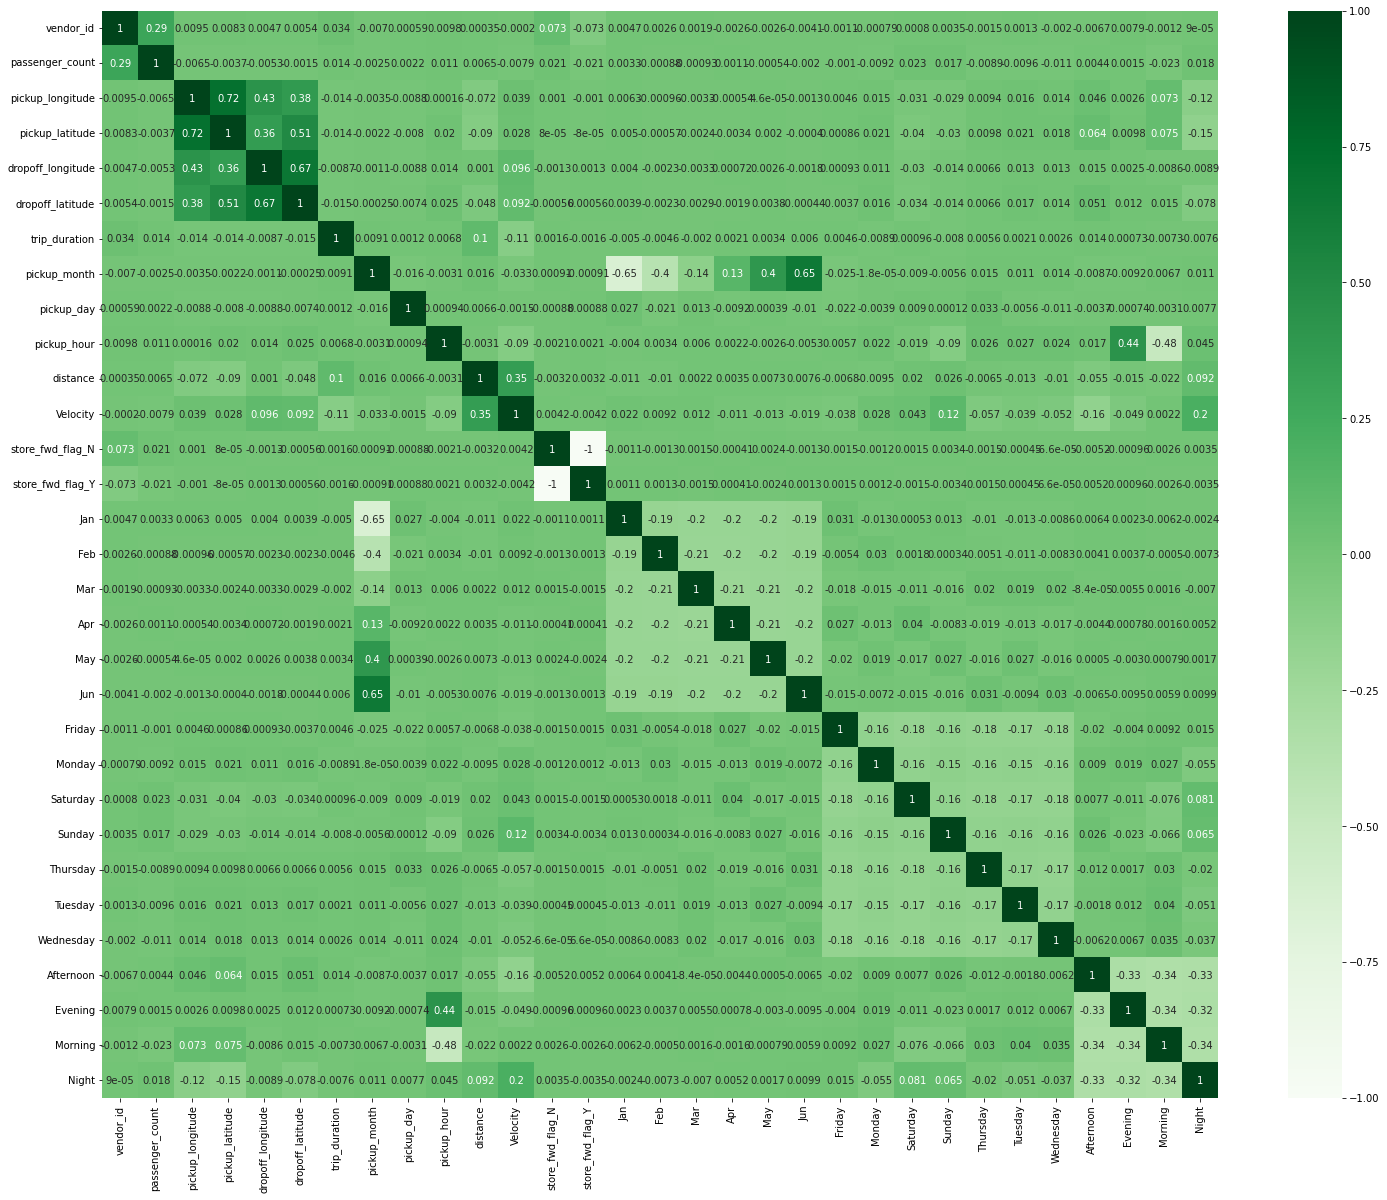

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [ ]:
new=df[['store_fwd_flag_N', 'store_fwd_flag_Y', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
       'distance']]
new_y = df['trip_duration']       

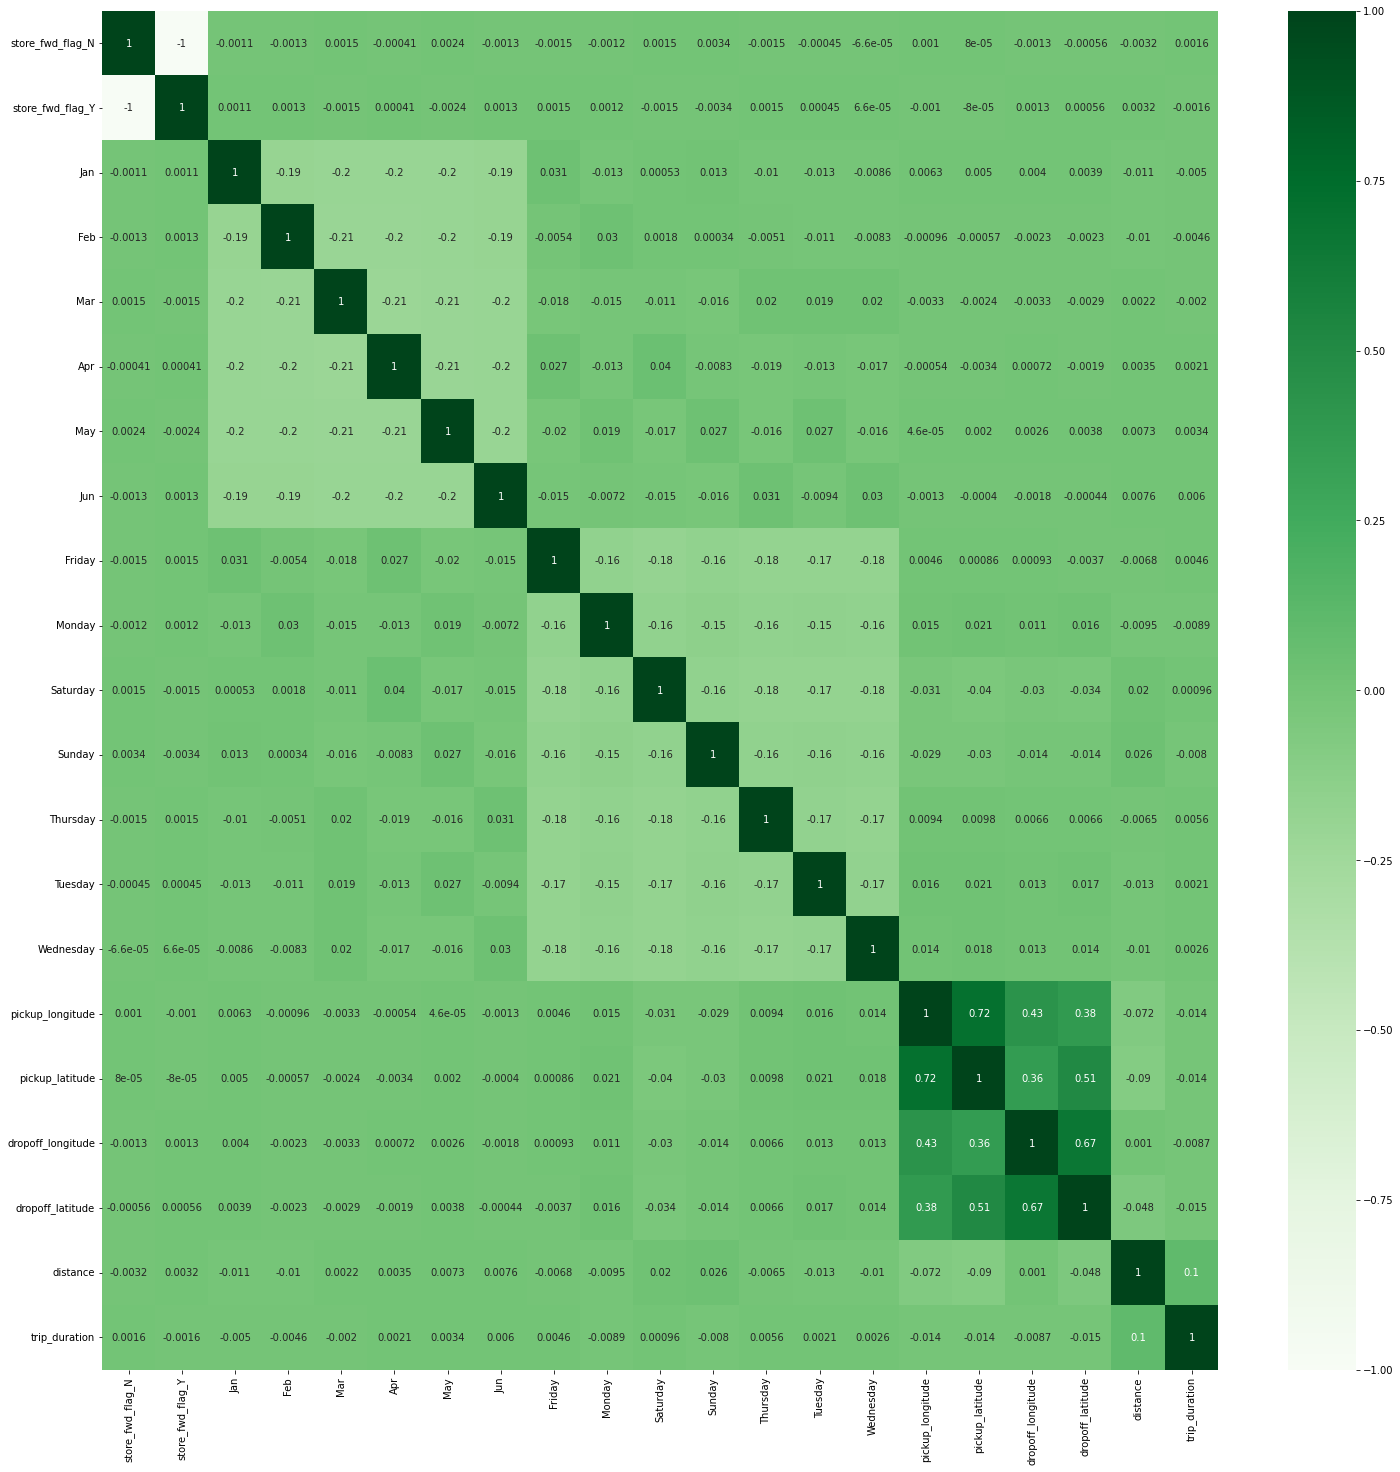

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(new.corr(),annot=True,cmap='Greens')

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(new, new_y,
                      test_size = 0.3, random_state = 1)
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(train_X,train_y)

LinearRegression()

In [ ]:
r2_score(test_y,pred)

-0.012858913200748612

In [ ]:
xgb_r.predict(test_X)

array([0.14596272, 0.2989533 , 0.22855812, ..., 0.11949825, 0.26711273,
       0.22901988], dtype=float32)

In [ ]:
# print(xgb_r.summary())

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(test_y, pred))

0.10175452876225571


In [ ]:
xgb_r.score(train_X,train_y)

0.021070438930266278

In [ ]:
xgb_r.score(test_X,test_y)

0.010390041317794751

In [ ]:
xgb_r.feature_importances_

array([0.00421395, 0.        , 0.01085351, 0.06733807, 0.10160712,
       0.03307518, 0.01299904, 0.01333225, 0.09286335, 0.02568689,
       0.03269098, 0.04222131, 0.01367264, 0.00906927, 0.01859222,
       0.060621  , 0.02087571, 0.02807745, 0.04860938, 0.3636007 ],
      dtype=float32)

In [ ]:
r2_score(test_y,pred)

0.010390041317794751

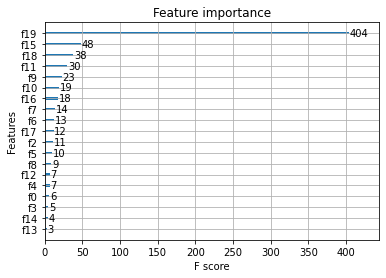

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_r)
plt.show()

In [ ]:
train_X

array([[1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.11489435],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.06986066],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11531727],
       ...,
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.04012102],
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.38235312],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25239299]])

In [ ]:
xgb_r.predict(train_X[:100])

array([0.15014935, 0.12609267, 0.20886749, 0.26457006, 0.3898378 ,
       0.22417888, 0.13413441, 0.15550214, 0.1969994 , 0.23887885,
       0.19791877, 0.1773879 , 0.12896511, 0.10157177, 0.24708328,
       0.19837302, 0.27806866, 0.11964568, 0.15874505, 0.13892555,
       0.27330762, 0.24574485, 0.23405641, 0.16999614, 0.40456542,
       0.16514125, 0.19806159, 0.37803748, 0.13703722, 0.1404824 ,
       0.15163517, 0.14233446, 0.34411958, 0.22168717, 0.15283245,
       0.14193752, 0.21301007, 0.14439446, 0.17113101, 0.2103993 ,
       0.15184349, 0.17722389, 0.19885811, 0.12263057, 0.20633495,
       0.18161136, 0.18009466, 0.17064086, 0.26897752, 0.2595274 ,
       0.14865926, 0.22580847, 0.19197285, 0.15359914, 0.12579411,
       0.16872874, 0.13530973, 0.21039617, 0.22152165, 0.391454  ,
       0.28925034, 0.14192057, 0.2329528 , 0.18695992, 0.19513237,
       0.24464089, 0.3455131 , 0.12773141, 0.2239191 , 0.41989437,
       0.22952273, 0.11371422, 0.10347214, 0.18653181, 0.11551